In [1]:
import numpy as np
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.base import BaseEstimator
from sklearn.base import RegressorMixin
import math
from sklearn.metrics import mean_squared_error

In [2]:
import matplotlib as mpl
import warnings 
warnings.simplefilter('ignore')

In [3]:
import  subprocess
import sys
import os

# Take data

In [7]:
X_train_all = np.loadtxt('train_X_05.txt')
y_train_all = np.loadtxt('train_y_05.txt')
X_test_all = np.loadtxt('test_X_05.txt')

ValueError: the number of columns changed from 328 to 173 at row 2; use `usecols` to select a subset and avoid this error

In [4]:
def custom_opener(name:str):
    with open(name) as f:
        array=[]
        k=0
        for line in f.readlines():
            if k%2==0:
                lis=line.rstrip('\n').split(" ")
            if k%2==1:
                tt=line.rstrip('\n').split(" ")
                midl=lis[-1]+tt[0]
                lis[-1]=midl
                tt.pop(0)
                lis=lis+tt
                array.append(lis)
            k+=1
    return np.array(array)

In [5]:
X_train=custom_opener('train_X_05.txt')
y_train = np.loadtxt('train_y_05.txt')
X_test = custom_opener('test_X_05.txt')

In [9]:
X_train[0][0],X_train[0][-1]#,X_train_all[0][328],X_train_all[0][327]

('5.371264437873712883e-02', '6.351061916933915530e-01')

In [10]:
X_train.shape, y_train.shape, X_test.shape

((64, 500), (64, 5), (32, 500))

In [11]:
max_ncomp = 16

In [12]:
cv = [
    GridSearchCV(
        PLSRegression(scale = False),
        {'n_components': list(range(1, max_ncomp+1)),'max_iter': [1000]},
        scoring = 'neg_root_mean_squared_error',
        return_train_score = True,
        cv=5
    ).fit(X_train, y_train[:,i])
    for i in range(y_train.shape[1])
]
# Извлечём результаты и сохраним их в виде матриц
ncomps = np.array([
    [p['n_components'] for p in v.cv_results_['params']] for v in cv
]).T
RMSEP = np.array([
    -v.cv_results_['mean_train_score'] for v in cv
]).T
RMSECV = np.array([
    -v.cv_results_['mean_test_score'] for v in cv
]).T

In [17]:
ncomps.shape

(16, 5)

In [19]:
predictors=[cv[i].predict(X_test) for i in range(y_train.shape[1])]

In [23]:
for i in range(y_train.shape[1]):
    print("RMSEP",RMSEP[:,i])
    print("RMSECV",RMSECV[:,i])
    print()

RMSEP [1.51597782e-01 1.35791988e-01 1.04619332e-01 6.44545201e-02
 4.34037433e-02 2.43586168e-02 1.19394728e-02 5.24595900e-03
 2.15692768e-03 7.24820444e-04 2.61895152e-04 8.98470554e-05
 3.04341441e-05 9.94544562e-06 3.25264680e-06 1.01530103e-06]
RMSECV [0.1548987  0.1451601  0.14895713 0.13916753 0.13545895 0.13564666
 0.13671613 0.13640241 0.13641677 0.13635549 0.13632626 0.13632102
 0.13631778 0.13631558 0.13631504 0.13631486]

RMSEP [1.39259067e-01 1.02259274e-01 6.53451560e-02 4.43842598e-02
 2.72077108e-02 1.51102940e-02 5.01940723e-03 2.10055605e-03
 9.03385132e-04 3.25605574e-04 1.11294314e-04 3.90606781e-05
 1.27377298e-05 3.92562146e-06 1.23783986e-06 3.82906579e-07]
RMSECV [0.14829278 0.12675398 0.0926717  0.07907761 0.07444178 0.07014447
 0.06964932 0.06984175 0.0696393  0.06981242 0.06981785 0.06982902
 0.06982981 0.06982953 0.06982961 0.06982966]

RMSEP [1.83994136e-01 1.27900083e-01 6.95983892e-02 4.36228563e-02
 2.40630780e-02 1.27768788e-02 5.06106523e-03 1.9074308

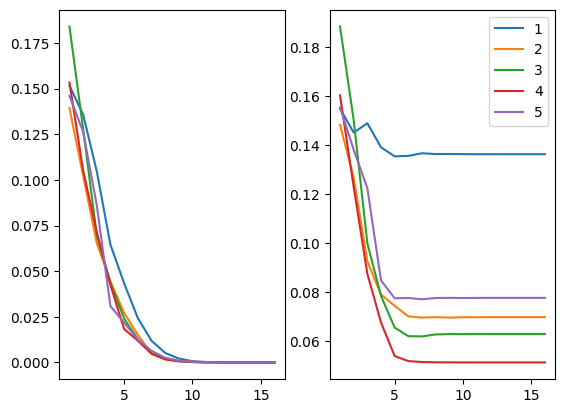

In [20]:
plt.subplot(1, 2, 1); plt.plot(ncomps, RMSEP);
plt.subplot(1, 2, 2); plt.plot(ncomps, RMSECV); plt.legend(list(range(1, y_train.shape[1]+1))); plt.show()

In [24]:
n_comps = (5, 6, 6, 6, 5)

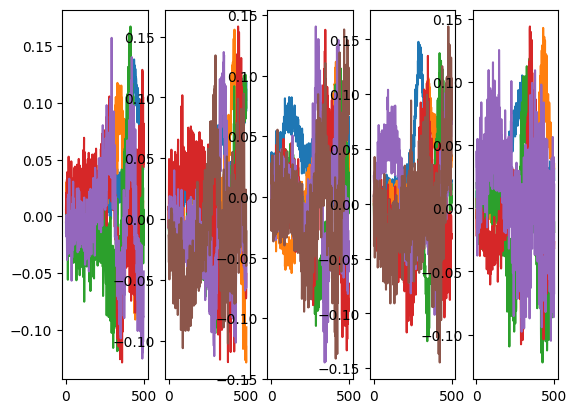

In [25]:
models = []
for i in range(len(n_comps)):
    m = PLSRegression(
        n_components = n_comps[i], scale = False
    ).fit(X_train, y_train[:,i])
    models.append(m)
    plt.subplot(1, len(n_comps), i+1)
    plt.plot(m.x_weights_)
plt.show()
    
predictions = []
for i in range(len(n_comps)):
    predictions.append(models[i].predict(X_test)[:,0])

np.savetxt('y_test.txt', np.array(predictions).T)

In [13]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

TypeError: unhashable type: 'numpy.ndarray'

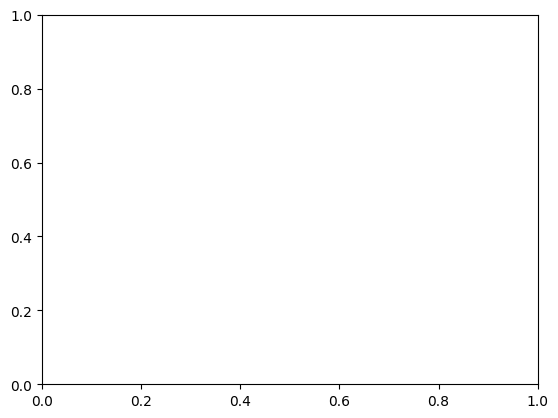

In [14]:
plt.plot(X_train.T); plt.show()

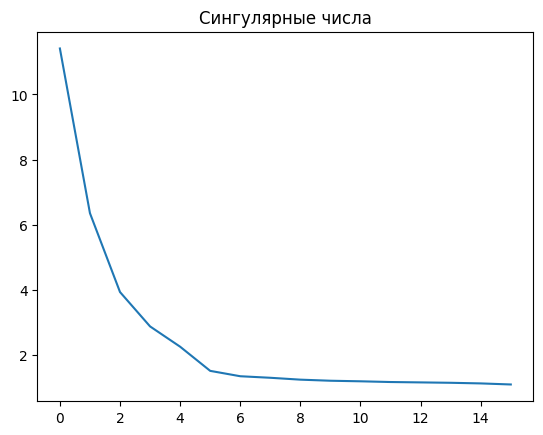

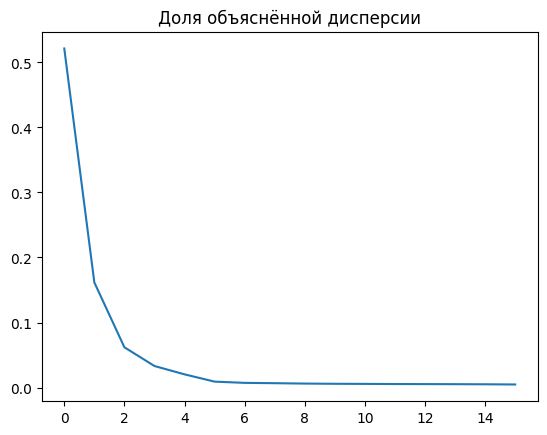

In [15]:
max_ncomp = 16
pc = PCA(n_components = max_ncomp).fit(X_train)
plt.plot(pc.singular_values_)
plt.title('Сингулярные числа')
plt.show()
plt.plot(pc.explained_variance_ratio_)
plt.title('Доля объяснённой дисперсии')
plt.show()

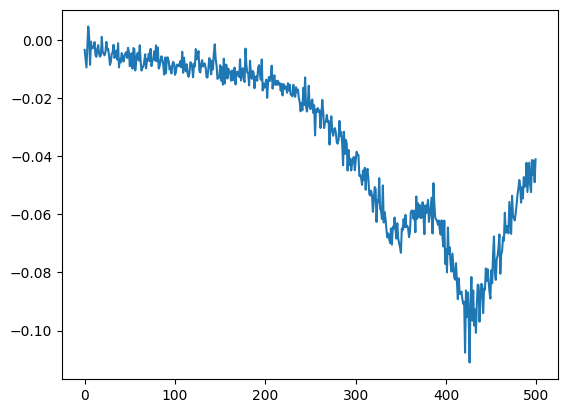

In [20]:
PCA_comps = 1
plt.plot(pc.components_[0:PCA_comps,:].T)
plt.show()